<a href="https://colab.research.google.com/github/BabaGeorge22/MAT-421/blob/main/HWF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module F Homework - George Tome**

Sections 20.1 - 20.4

**Section 20.1 - Numerical Differentiation Problem Statement**

We normally only know the function f at discrete grid points.

We want to approximate the derivative f'(x) from these discrete values.

A numerical grid has points xj separated by a step size h.

**Section 20.2 - Finite Difference Approximating Derivatives**

Forward difference: uses f(x j+1) and f(x j)

Backward difference: uses f(x j) and f(x j-1)

Central difference: uses f(x j+1) and f(x j-1)

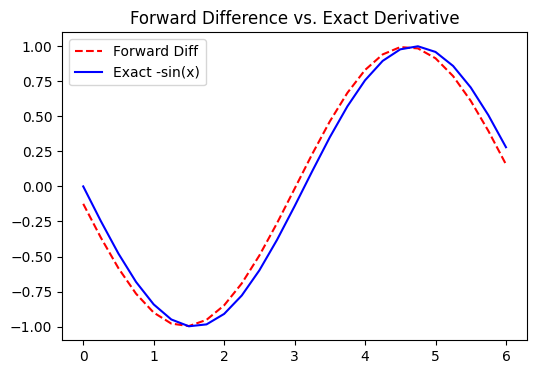

Max error with forward diff: 0.12457129013946386


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Size
h = 0.25
# Grid from 0 to 2*pi
x = np.arange(0, 2*np.pi, h)
# f(x) = cos(x)
y = np.cos(x)

# Forward difference
fwd_diff = np.diff(y) / h
x_diff = x[:-1]  # derivative is between points

# Exact derivative of cos(x) is -sin(x)
exact_deriv = -np.sin(x_diff)

# Plot
plt.figure(figsize=(6,4))
plt.plot(x_diff, fwd_diff, 'r--', label='Forward Diff')
plt.plot(x_diff, exact_deriv, 'b', label='Exact -sin(x)')
plt.legend()
plt.title('Forward Difference vs. Exact Derivative')
plt.show()

# Error
error = np.abs(exact_deriv - fwd_diff)
print("Max error with forward diff:", np.max(error))

Use np.diff for forward differences.

The max error usualy shrinks as h gets smaller.

**Section 20.3 - Approximating Higher-Order Derivatives**

We can approximate second derivatives and beyond using finite differences.

We can get higher accuracy using more points in the finite difference formula.

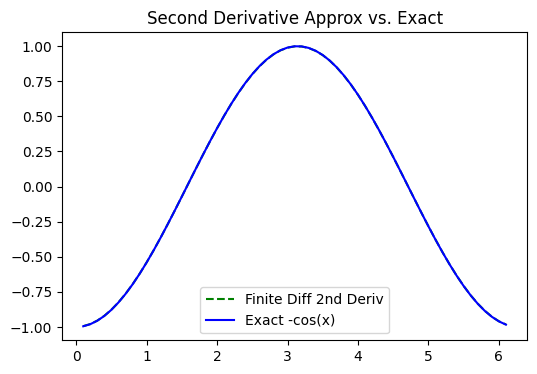

Max error in second derivative approx: 0.0008323351372367949


In [4]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1
x = np.arange(0, 2*np.pi, h)
y = np.cos(x)

# Second derivative approx: f''(x_j) ~ [f(x_{j+1}) - 2f(x_j) + f(x_{j-1})]/h^2
# skip the first and last point
d2_approx = (y[2:] - 2*y[1:-1] + y[:-2])/(h**2)
x_mid = x[1:-1]  # corresponding points

# Exact second derivative of cos(x) is -cos(x)
exact_d2 = -np.cos(x_mid)

# Plot
plt.figure(figsize=(6,4))
plt.plot(x_mid, d2_approx, 'g--', label='Finite Diff 2nd Deriv')
plt.plot(x_mid, exact_d2, 'b', label='Exact -cos(x)')
plt.legend()
plt.title('Second Derivative Approx vs. Exact')
plt.show()

# Error
error_2nd = np.abs(d2_approx - exact_d2)
print("Max error in second derivative approx:", np.max(error_2nd))

Skip boundary points because the formula references x j-1 and x j+1.

The second derivative approximation typically has accuracy O(h^2).

**Section 20.4 - Numerical Differentiation with Nois**e

Real data usualy has noise.

Even a small noise in f(x) can become large in f'(x) if the step size is small.

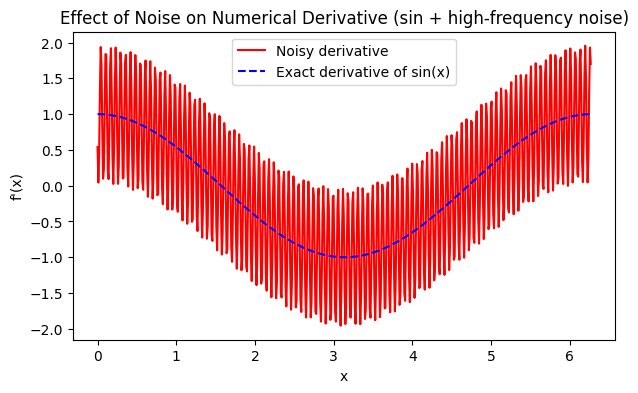

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon = 0.01       # small noise amplitude
omega = 100          # high frequency
h = 0.01             # step size
x = np.arange(0, 2*np.pi, h)

# Base function: sin(x)
# Add noise:   epsilon * cos(omega*x)
f_noisy = np.sin(x) + epsilon * np.cos(omega * x)

# Numerical derivative via forward difference
fwd_diff_noisy = np.diff(f_noisy) / h
x_diff = x[:-1]

# Exact derivative of sin(x) is cos(x)
exact_deriv = np.cos(x_diff)

# Plot
plt.figure(figsize=(7,4))
plt.plot(x_diff, fwd_diff_noisy, 'r-', label='Noisy derivative')
plt.plot(x_diff, exact_deriv, 'b--', label='Exact derivative of sin(x)')
plt.title('Effect of Noise on Numerical Derivative (sin + high-frequency noise)')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()
plt.show()

Define f(x)=sin(x)+ϵcos(ωx).

The true derivative of sin(x) is cos(x), but added noise term changes the numerical derivative at each step.

If ω is large, the fast oscillations in the noisy part can dominate the derivative.